# Extrinsic Eval (IV)
## Visualization of Results

In [1]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
path = "DAN_COMBINATIONS"

In [3]:
configs = []

In [4]:
for root, _dir, files in os.walk(path):
    for config in [x for x in files if x.endswith("json")]:
        with open(os.path.join(root, config), "r") as _json:
            _dict = json.load(_json)
            configs.append(pd.DataFrame.from_dict(_dict, orient = "index"))
        #pd.read_json(os.path.join(root, config),  orient="index")

In [5]:
df = pd.concat(configs, axis = 1, sort = False)

In [6]:
df = df.transpose().reset_index()

In [7]:
df_drop = df.sort_values(by = ["valid_score_linear_kernel"], ascending=False)
writer = pd.ExcelWriter('DAN_configs.xlsx', engine='xlsxwriter')
df_drop.to_excel(writer, sheet_name="DAN Eval")
writer.save()

In [7]:
df_visualization = df.dropna().drop(columns = ["path", "classifier_shape", "index", "classes"]).sort_values(by = ["valid_score_linear_kernel"], ascending=False)

In [8]:
df_visualization.head() # The five best models

,epoches,dropout,hidden_layer,time,ft_model,insampling_linear_kernel,test_linear_kernel,valid_score_linear_kernel,insampling_rbf_kernel,test_rbf_kernel,valid_score_rbf_kernel,purity_score_kmeans
4,50,0.6,5,4.16261035601298,ft_models/fasttext_12/model.joblib,0.98469,0.9809,0.833333,0.980597,0.976808,0.733333,0.974633
5,50,0.6,5,4.16261035601298,ft_models/fasttext_12/model.joblib,0.98469,0.9809,0.833333,0.980597,0.976808,0.733333,0.974633
0,10,0.4,4,1.0043946822484335,ft_models/fasttext_12/model.joblib,0.982265,0.986357,0.8,0.980597,0.983629,0.733333,0.969822
1,50,0.6,4,4.235410058498383,ft_models/fasttext_31/model.joblib,0.983629,0.987722,0.8,0.981355,0.986357,0.7,0.972708
2,10,0.5,5,0.9984915216763814,ft_models/fasttext_12/model.joblib,0.983477,0.983629,0.783333,0.981204,0.982265,0.75,0.970696


In [9]:
df_visualization = df_visualization.astype("float64")
df_visualization["classifier_shape"] = df["classifier_shape"]

ValueError: could not convert string to float: 'ft_models/fasttext_12/model.joblib'

In [ ]:
columns_to_drop = ["test_rbf_kernel", "test_linear_kernel", "insampling_rbf_kernel", "insampling_linear_kernel", "valid_score_rbf_kernel", "time"]

In [10]:
color_palette = {"[200]": "#00678F", "[100, 50]": "#3082A1", "[200, 100]":"#009FDB"}

In [16]:
df_1 = df_visualization.drop(columns = columns_to_drop)

## A General Overview 

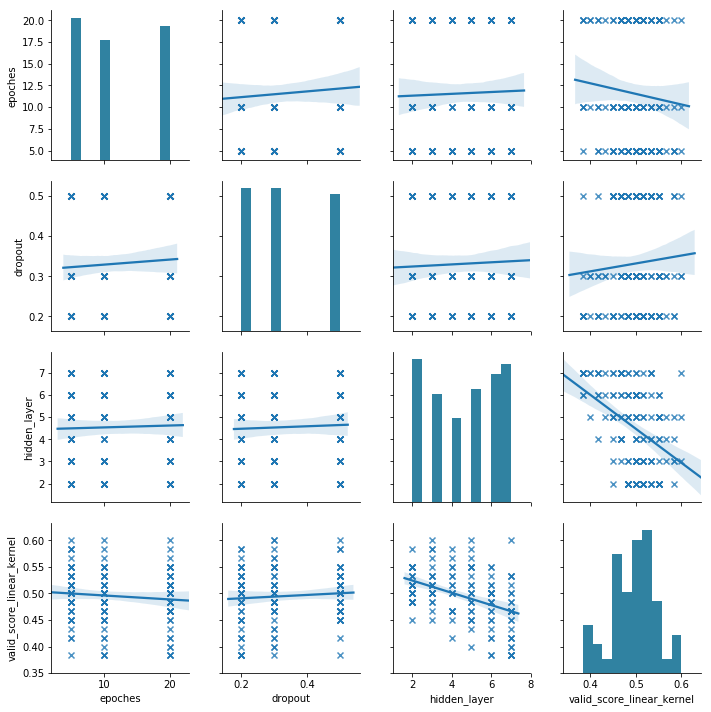

In [31]:
pairplot = sns.pairplot(df_1, kind="reg", markers = ["x"], palette=color_palette, diag_kws = {"color": "#3082A1"})

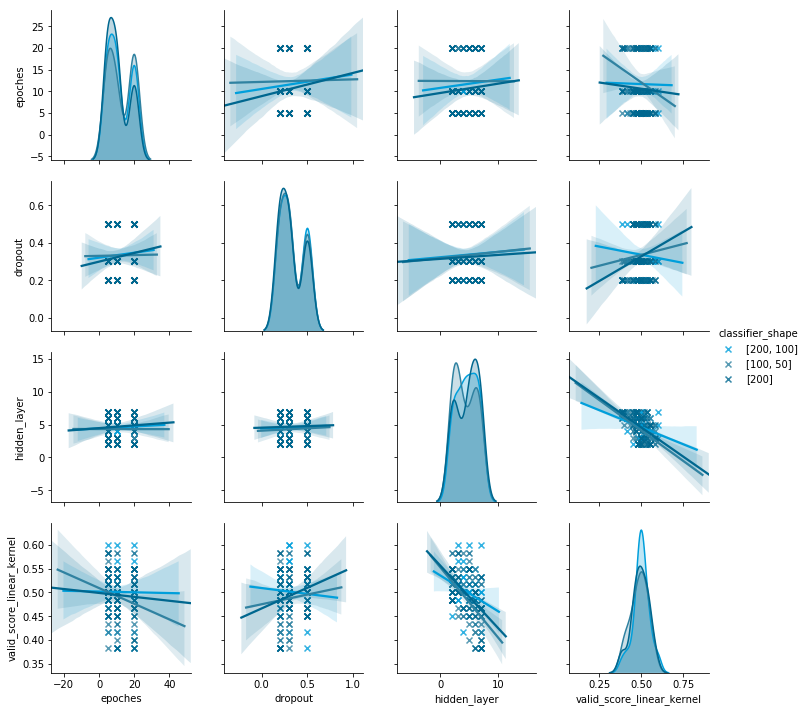

In [17]:
pairplot = sns.pairplot(df_1, kind="reg", palette=color_palette, markers = ["x", "x", "x"], hue = "classifier_shape")

### Correlations

In [132]:
### Own Color Map

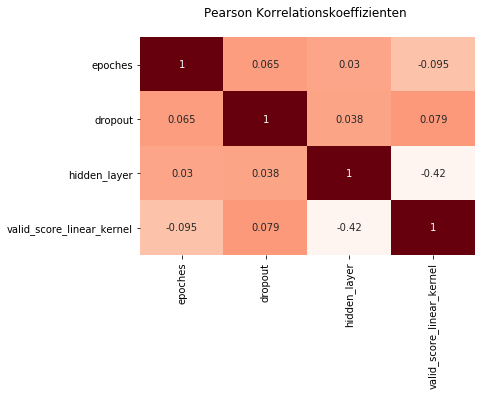

In [22]:
fig = plt.Figure()
ax = plt.subplot(1,1,1)
title = ax.set_title("Pearson Korrelationskoeffizienten \n")
corr_heatmap = sns.heatmap(df_1.corr(),  annot=True, cbar=False, cmap = "Reds", ax = ax)

## Taking a closer Look
On Windows Pearson Coefficent is shown

In [23]:
columns = ["hidden_layer", "valid_score_linear_kernel"]

/anaconda3/envs/rs/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


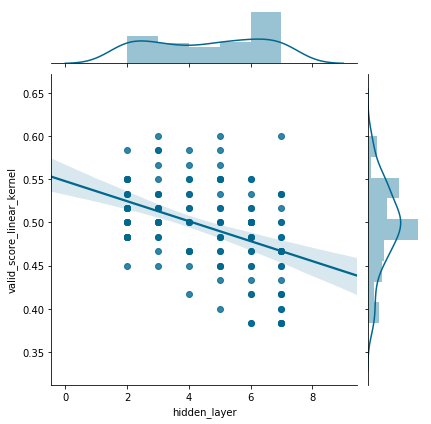

In [27]:
jt_plot = sns.jointplot(x = "hidden_layer", color = "#00678F", y = "valid_score_linear_kernel", data = df[columns].dropna().astype("float64"), kind = "reg")

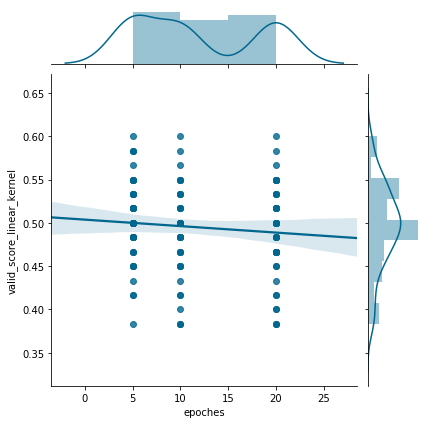

In [28]:
jt_plot = sns.jointplot(x = "epoches", y = "valid_score_linear_kernel",color = "#00678F", data = df_visualization, kind = "reg")

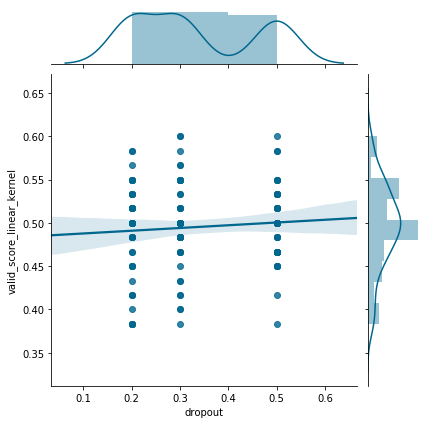

In [29]:
jt_plot = sns.jointplot(x = "dropout", color = "#00678F",y = "valid_score_linear_kernel", data = df_visualization, kind = "reg")